In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plot
import seaborn as sns
import scipy
import math
from statsmodels.distributions.empirical_distribution import ECDF
from functools import reduce

from random import sample
#import dill
%matplotlib inline
sns.set(style="ticks")

In [3]:
#r0 with honest PV
L = 1000
n= 1000000
# Vs = [5000,6000,7000,8000,9000,10000,15000,20000]
# Vs = [5000,7500,10000,12500,15000,20000]
Vs = [0.001*n, 0.002*n, 0.003*n, 0.004*n, 0.005*n,0.006*n, 0.007*n, 0.008*n, 0.009*n, 0.01*n,0.015*n,0.02*n, 0.03*n]
# Vs = [0.005*n,0.0075*n,0.01*n,0.0125*n,0.015*n,0.02*n]
macro_rmax = []
eta = 0.95
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax)
 

Vs =  [1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 15000.0, 20000.0, 30000.0]
r0 = [0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 9.0, 13.0, 21.0]


In [7]:
#r0 with honest partial view to pass >=eta, dihonest partial view to pass < eta
L = 1000
n= 500000
Vs = [0.001*n, 0.002*n, 0.003*n, 0.004*n, 0.005*n,0.006*n, 0.007*n, 0.008*n, 0.009*n, 0.01*n,0.015*n,0.02*n, 0.03*n]
vs = [0.001*n-1, 0.002*n-1, 0.003*n-1, 0.004*n-1, 0.005*n-1,0.006*n-1, 0.007*n-1, 0.008*n-1,
      0.009*n-1, 0.01*n-1,0.015*n-1,0.02*n-1, 0.03*n-1]
# Vs = [0.005*n,0.0075*n,0.01*n,0.0125*n,0.015*n,0.02*n]
macro_rmax1 = []
eta = 0.95
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax1 = R_rv.isf(eta)
    macro_rmax1.append(rmax1)
    rmax1, R_rv.sf(rmax1-1)
    ####
    
macro_rmax2 = []    
for v in vs:    
    Rv_rv = scipy.stats.hypergeom(n, L, v)
    rmax2 = Rv_rv.isf(eta)
    macro_rmax2.append(rmax2)
    rmax2, Rv_rv.sf(rmax2)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax1)
print('r0 =', macro_rmax2)
 

Vs =  [500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 7500.0, 10000.0, 15000.0]
r0 = [0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 9.0, 13.0, 21.0]
r0 = [0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 4.0, 5.0, 9.0, 13.0, 21.0]


In [2]:
def isin_row(df, record, cols=None):
    cols = cols or df.columns
    return reduce(lambda x, y:x&y, [df[f].isin([record[f]]) for f in cols]).any()

In [3]:
attributes_list = ['loan_amnt', 'home_ownership', 'term']

def parse_home_ownership(v):
    if v == 'RENT':
        return 0
    elif v == 'MORTGAGE':
        return 10
    elif v == 'OWN':
        return 20
    elif v == 'ANY':
        return 30
    else:
        raise ValueError('Unknown home ownership ' + v)

def parse_term(v):
    spl = v.strip().split(' ', 1)
    if spl[1] != 'months':
        raise ValueError('Unknown term ' + v)
    return spl[0]

attributes_shapings = dict([])
#attributes_shapings['grade'] = lambda v: ord(v)
attributes_shapings['home_ownership'] = parse_home_ownership
attributes_shapings['term'] = parse_term
#attributes_shapings['int_rate'] = lambda v: int(100.0*v)

n = 1000000

realdata = pd.read_csv('../input/lending-club-loan-data/loan.csv', nrows=n, header=0)
realdata = realdata[attributes_list].dropna()

for k, v in attributes_shapings.items():
    realdata[k] = realdata[k].apply(v)

realdata = realdata.astype(np.int64)

realdata.loc[:, 'id'] = pd.Series([k for k in range(realdata.shape[0])], index=realdata.index)
attributes_list.append('id')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
realdata.head()

,loan_amnt,home_ownership,term,id
0,2500,0,36,0
1,30000,10,60,1
2,5000,10,36,2
3,4000,10,36,3
4,30000,10,60,4


In [6]:
realdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1000000.0,15394.886100,9575.099084,1000.0,8000.00,13000.0,20000.00,40000.0
home_ownership,1000000.0,7.296660,6.657221,0.0,0.00,10.0,10.00,30.0
term,1000000.0,42.817464,10.823190,36.0,36.00,36.0,60.00,60.0
id,1000000.0,499999.500000,288675.278933,0.0,249999.75,499999.5,749999.25,999999.0


In [7]:
realdata.nunique()

loan_amnt            1561
home_ownership          4
term                    2
id                1000000
dtype: int64

In [8]:
# Concrete space size
#realdata.nunique().prod()

In [8]:
realmean = realdata.mean()
realmean

loan_amnt          15394.886100
home_ownership         7.296660
term                  42.817464
id                499999.500000
dtype: float64

In [9]:
realstd = realdata.std()
realstd

loan_amnt           9575.099084
home_ownership         6.657221
term                  10.823190
id                288675.278933
dtype: float64

In [10]:
realcov = realdata.cov()
realcov

,loan_amnt,home_ownership,term,id
loan_amnt,9.168252e+07,6051.590941,39613.073042,-1.416824e+08
home_ownership,6.051591e+03,44.318597,3.716007,7.426187e+03
term,3.961307e+04,3.716007,117.141438,-9.999410e+04
id,-1.416824e+08,7426.186796,-99994.104862,8.333342e+10


In [11]:
realcorr = realdata.corr()
realcorr

,loan_amnt,home_ownership,term,id
loan_amnt,1.000000,0.094937,0.382243,-0.051258
home_ownership,0.094937,1.000000,0.051574,0.003864
term,0.382243,0.051574,1.000000,-0.032004
id,-0.051258,0.003864,-0.032004,1.000000


In [12]:
realspr = pd.DataFrame(scipy.stats.spearmanr(realdata).correlation, columns=attributes_list, index=attributes_list)
#realspr = scipy.stats.spearmanr(realdata)
realspr

,loan_amnt,home_ownership,term,id
loan_amnt,1.000000,0.110754,0.425640,-0.035060
home_ownership,0.110754,1.000000,0.062123,0.004963
term,0.425640,0.062123,1.000000,-0.032004
id,-0.035060,0.004963,-0.032004,1.000000


In [13]:
#known_records_indexes = [5, 23, 388, 462, 499, 10, 280]
#known_records_indexes = [6545, 135, 1789]
#known_records_indexes = [3, 8, 28, 321, 405]
#known_records_indexes = [136, 148, 517, 569, 597, 704, 710, 719, 765, 871, 1085, 1105, 1182, 1234, 1257, 1434, 1547, 1638, 1855, 1935, 2092, 2113, 2330, 2370, 2688, 3031, 3078, 3128, 3152, 3233, 3290, 3437, 3453, 3544, 3627, 3917, 3927, 3946, 4320, 4325, 4351, 4466, 4575, 4826, 4841, 4987, 5093, 5174, 5213, 5392, 5514, 5565, 5719, 5929, 5947, 5962, 6073, 6087, 6202, 6234, 6333, 6338, 6391, 6429, 6432, 6441, 6728, 6889, 6921, 6952, 6967, 7187, 7201, 7202, 7279, 7548, 7576, 7657, 7699, 7727, 7756, 7913, 7945, 7982, 7998, 8010, 8084, 8090, 8311, 8493, 8585, 8827, 8976, 9235, 9329, 9412, 9657, 9740, 9756, 9866]
#known_records = realdata.iloc[known_records_indexes,:]
#known_records_indexes = []
#known_records = None

def sample_records(df, records_count):
    n = df.shape[0]
    L = records_count
    known_records_indexes = sample(range(n), k=L)
    known_records = df.iloc[known_records_indexes,:]
    return (known_records_indexes, known_records)

def count_present_records(df, known_records):
    records_present = 0
    for i in range(len(known_records)):
        rec = known_records.iloc[i,:]
        if isin_row(df, rec):
            records_present += 1
    return records_present

def count_present_records_distinguish(df, known_records, known_records_indexes):
    records_occurrences = dict([])
    for i in range(len(known_records)):
        rec = known_records.iloc[i,:]
        records_occurrences[known_records_indexes[i]] = 0
        if isin_row(df, rec):
            records_occurrences[known_records_indexes[i]] += 1
    return records_occurrences

def check_pass_test(df, known_records):
    for i in range(len(known_records)):
        rec = known_records.iloc[i,:]
        if not isin_row(df, rec):
            return False
    return True

In [2]:
def Psuccess(x, n, L):
    p = 1.0
    for i in range(L):
        p *= (x-i)
        p /= (n-i)
    return p

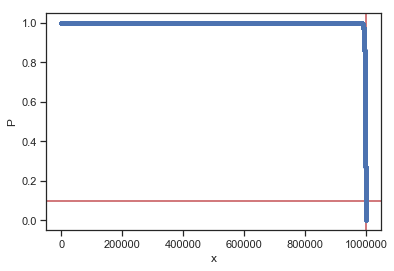

In [15]:
n = realdata.shape[0]
L = 500
eps = 0.1
nopt = min([x for x in range(L, n+1) if 1-Psuccess(x, n, L) <= eps])
nopt, 1-Psuccess(nopt, n, L)
plot.xlabel('x')
plot.ylabel('P')
plot.axvline(x=nopt, color='r')
plot.axhline(y=eps, color='r')
plot.plot([1-Psuccess(x, n, L) for x in range(L, n+1)], '.')

## Partial view

### Without generation

In [16]:
L = 500
x = 1000000

#dummyrow = realdata.iloc[0,:].apply(lambda _: 0).copy()
#dummyrowdf = pd.DataFrame(dummyrow).transpose()
#dummydf = pd.concat([dummyrowdf]*(n-x), ignore_index=True, sort=False)

#PVsizes = [(k*n) // 10 for k in range(1, 6)]
PVsizes = [10000]
R1 = []

for PVsize in PVsizes:
    mc_iter_count = 100

    present_records = mc_iter_count*[None]

    for k in range(mc_iter_count):
        (S_kri, S_kr) = sample_records(realdata, L)
        #(_, A_kr) = sample_records(realdata, x)
        A_kr = realdata
        Da_star = A_kr
        #Da_star = pd.concat([A_kr, dummydf], ignore_index=True, sort=False)
        assert Da_star.shape == realdata.shape
        (_, PV) = sample_records(Da_star, PVsize)
        present_records[k] = pd.Series(count_present_records_distinguish(PV, S_kr, S_kri))
        #print(present_records[k])
        #print('---------------')

    rec_bounded_counts = pd.Series([present_records[k][present_records[k] != 0].count() for k in range(mc_iter_count)])
    #plot.plot(rec_bounded_counts, 'o')
    #print(rec_bounded_counts)
    R_empirical_dist = [rec_bounded_counts[rec_bounded_counts == r].count()/mc_iter_count for r in range(0, L+1)]
    R1.append(R_empirical_dist)

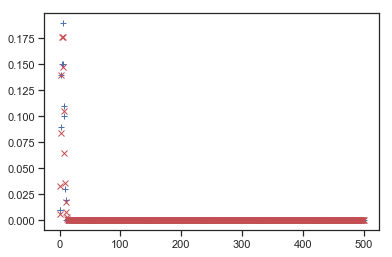

In [17]:
V = 10000
rv = scipy.stats.hypergeom(n, L, V)
plot.plot([r for r in range(0, L+1)], R_empirical_dist, 'b+', [r for r in range(0, L+1)], [rv.pmf(r) for r in range(0, L+1)], 'rx')

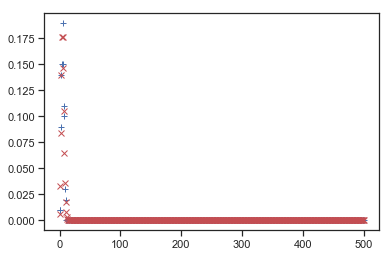

In [18]:
rv2 = scipy.stats.binom(L, V/n)
plot.plot([r for r in range(0, L+1)], R_empirical_dist, 'b+', [r for r in range(0, L+1)], [rv2.pmf(r) for r in range(0, L+1)], 'rx')

In [3]:
L = 100
n = 500000
V = 25000
eta = 0.95
R_rv = scipy.stats.hypergeom(n, L, V)
rmax = R_rv.isf(eta)
rmax, R_rv.sf(rmax)

(2.0, 0.8817617250531364)

In [6]:
L = 100
V = 35000
n = 500000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0]


In [4]:
L = 50
V = 40000
n = 500000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


In [5]:
L = 50
V = 50000
n = 500000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0]


In [6]:
L = 500
V = 5000
n= 500000
macro_rmax = []
macro_eta = [0.9, 0.92, 0.94, 0.96, 0.98, 0.99]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

[0.9, 0.92, 0.94, 0.96, 0.98, 0.99]
[2.0, 2.0, 2.0, 2.0, 1.0, 1.0]


In [10]:
L = 100
V = 20000
n= 500000
macro_rmax = []
macro_eta = [0.9, 0.92, 0.94, 0.95, 0.96, 0.98, 0.99]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

[0.9, 0.92, 0.94, 0.95, 0.96, 0.98, 0.99]
[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


In [21]:
L = 500
V = 5000
n= 500000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

macro_r0 =[]
for eta in macro_eta: 
    r0 = scipy.stats.hypergeom.isf(eta,n,L,V)
    macro_r0.append(r0)
    
print(macro_r0)    

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0]


In [6]:
L = 1000
V = 10000
n= 1000000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

macro_r0 =[]
for eta in macro_eta: 
    r0 = scipy.stats.hypergeom.isf(eta,n,L,V)
    macro_r0.append(r0)
    
print(macro_r0)    

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 3.0]


In [7]:
L = 1000
V = 5000
n= 500000
macro_rmax = []
macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for eta in macro_eta:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print(macro_eta)
print(macro_rmax)

macro_r0 =[]
for eta in macro_eta: 
    r0 = scipy.stats.hypergeom.isf(eta,n,L,V)
    macro_r0.append(r0)
    
print(macro_r0)    

[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
[6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 3.0]


In [10]:
L = 1000
n= 1000000
Vs = [5000,6000,7000,8000,9000,10000,15000,20000]
macro_rmax = []
eta = 0.9
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax)

Vs =  [5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]
r0 = [2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 10.0, 14.0]


In [12]:
L = 1000
n= 1000000
# Vs = [5000,6000,7000,8000,9000,10000,15000,20000]
# Vs = [5000,7500,10000,12500,15000,20000]
Vs = [0.005*n,0.0075*n,0.01*n,0.0125*n,0.015*n,0.02*n]
macro_rmax = []
eta = 0.95
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax)
 

Vs =  [5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]
r0 = [2.0, 3.0, 5.0, 7.0, 9.0, 13.0]


In [9]:
L = 1000
n= 1000000
Vs = [5000,6000,7000,8000,9000,10000,15000,20000]
macro_rmax = []
eta = 0.99
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax)
 

Vs =  [5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]
r0 = [1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 7.0, 10.0]


In [13]:
L = 1000
n= 1000000
# Vs = [5000,6000,7000,8000,9000,10000,15000,20000]
# Vs = [5000,7500,10000,12500,15000,20000]
Vs = [0.005*n,0.0075*n,0.01*n,0.0125*n,0.015*n,0.02*n]
macro_rmax = []
eta = 0.99
# macro_eta = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
for V in Vs:
    R_rv = scipy.stats.hypergeom(n, L, V)
    rmax = R_rv.isf(eta)
    macro_rmax.append(rmax)
    rmax, R_rv.sf(rmax-1)
    #macrovopts.append(vopts)
#for eta in macro_eta:
print('Vs = ', Vs)
print('r0 =', macro_rmax)
 

Vs =  [5000.0, 7500.0, 10000.0, 12500.0, 15000.0, 20000.0]
r0 = [1.0, 2.0, 3.0, 5.0, 7.0, 10.0]
